# Revisão dos comandos em Python

# Sumário

**[1. Análise Exploratória](#Analise_Exploratoria)<br>**
&nbsp;&nbsp;&nbsp;[1.1. Lendo um arquivo](#Lendo_Arquivo)<br>
&nbsp;&nbsp;&nbsp;[1.2. Apresentando a tabela](#Apresenta_Tabela)<br>
&nbsp;&nbsp;&nbsp;[1.3. Checando o tipo de cada coluna](#Tipo_Coluna)<br>
&nbsp;&nbsp;&nbsp;[1.4. Visualizando colunas específicas](#Cols_Especificas)<br>
&nbsp;&nbsp;&nbsp;[1.5. Transformando coluna em índice](#Col_to_index)<br>
&nbsp;&nbsp;&nbsp;[1.6. Filtragem do DataFrame dada uma condição](#Filtro_condicao)<br>
&nbsp;&nbsp;&nbsp;[1.7. Ordenando valores](#Ordenar)<br>
&nbsp;&nbsp;&nbsp;[1.8. Criando categorias](#Categorizacao)<br>
&nbsp;&nbsp;&nbsp;[1.9. Contando valores de uma variável qualitativa](#count)<br>
&nbsp;&nbsp;&nbsp;[1.10. Normalizando a contagem](#normalizar)<br>
&nbsp;&nbsp;&nbsp;[1.11. Discretizando uma variável quantitativa](#discretizar)<br>
&nbsp;&nbsp;&nbsp;[1.12. Cruzando variáveis discretas](#cruzar)<br>
&nbsp;&nbsp;&nbsp;[1.13. Plotando o gráfico da crosstab](#plot)<br>
&nbsp;&nbsp;&nbsp;[1.14. Normalizando a crosstab](#normalizar_crosstab)<br>
&nbsp;&nbsp;&nbsp;[1.15. Descrevendo uma variável quantitativa](#describe)<br>
&nbsp;&nbsp;&nbsp;[1.16. Correlação entre duas colunas](#correlacao)<br>
&nbsp;&nbsp;&nbsp;[1.17. Juntando 2 DataFrames diferentes](#join)<br>
&nbsp;&nbsp;&nbsp;[1.18. Filtrando por quantil](#quantil)<br>
&nbsp;&nbsp;&nbsp;[1.19. Boxplot](#boxplot)<br>
&nbsp;&nbsp;&nbsp;[1.20. Boxplot com agrupamento](#boxplot_agrupamento)<br>
&nbsp;&nbsp;&nbsp;[1.21. Histograma de densidade](#histograma_densidade)<br>
&nbsp;&nbsp;&nbsp;[1.22. Analisando duas variáveis](#duas_variaveis)<br>

**[2. Modelos Probabilísticos](#Analise_Exploratoria)<br>**
&nbsp;&nbsp;&nbsp;[2.1. Exercícios Normal](#exercicios)<br>
&nbsp;&nbsp;&nbsp;[2.2. Construindo as curvas e gerando amostras aleatórias](#curvas_amostras)<br>
&nbsp;&nbsp;&nbsp;[2.3. Construindo as curvas e gerando amostras aleatórias](#duas_variaveis)<br>

**Bibliotecas importantes:**

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
%matplotlib inline

<a id="Analise_Exploratoria"></a>
## Análise Exploratória

<a id='Lendo_Arquivo'></a>
**Lendo um arquivo:**

In [2]:
df = pd.read_excel('WorldBank.xlsx')

<a id="Apresenta_Tabela"></a>
**Apresentando a tabela:**

In [3]:
df.head(5)
# head(n) mostra as n primeiras linhas da tabela
# tail(n) mostra as n últimas linhas da tabela

,Country,Population,GDPcapita,surface,region,landlocked
0,Albania,2901883,1915.424459,28750,europe_east,0
1,Algeria,36036159,2231.980246,2381740,africa_north,0
2,Angola,21219954,623.245275,1246700,africa_sub_saharan,0
3,Antigua and Barbuda,87233,10614.794315,440,america_north,0
4,Argentina,41222875,10749.319224,2780400,america_south,0


<a id="Tipo_Coluna"></a>
**Checando o tipo de cada coluna:**

In [4]:
df.dtypes

Country        object
Population      int64
GDPcapita     float64
surface         int64
region         object
landlocked      int64
dtype: object

<a id="Cols_Especificas"></a>
**Visualizando colunas específicas:**

In [5]:
df['Country'].tail(5)

163      Vanuatu
164    Venezuela
165      Vietnam
166       Zambia
167     Zimbabwe
Name: Country, dtype: object

<a id="Col_to_index"></a>
**Transformando coluna em índice:**

In [6]:
df = df.set_index('Country')
df.head(5)

,Population,GDPcapita,surface,region,landlocked
Country,,,,,
Albania,2901883,1915.424459,28750,europe_east,0
Algeria,36036159,2231.980246,2381740,africa_north,0
Angola,21219954,623.245275,1246700,africa_sub_saharan,0
Antigua and Barbuda,87233,10614.794315,440,america_north,0
Argentina,41222875,10749.319224,2780400,america_south,0


<a id="Filtro_condicao"></a>
**Filtragem do DataFrame dada uma condição:**

In [7]:
df[df['GDPcapita'] > 5000].head(5)

,Population,GDPcapita,surface,region,landlocked
Country,,,,,
Antigua and Barbuda,87233,10614.794315,440,america_north,0
Argentina,41222875,10749.319224,2780400,america_south,0
Australia,22162863,25190.839860,7741220,east_asia_pacific,0
Austria,8391986,26642.993858,83870,europe_west,1
Bahamas,360830,19395.152312,13880,america_north,0


<a id="Ordenar"></a>
**Ordenando valores:**

In [8]:
df.sort_values(by = 'Population', ascending = False).head(5)
# ascending=True é o padrão e ordenaria do menor para o maior

,Population,GDPcapita,surface,region,landlocked
Country,,,,,
China,1340968737,2426.332466,9600000,east_asia_pacific,0
India,1230984504,794.801256,3287260,asia_west,0
United States,309876170,37329.615914,9831510,america_north,0
Indonesia,241613126,1145.385435,1904570,east_asia_pacific,0
Brazil,198614208,4716.614125,8514880,america_south,0


<a id="Categorizacao"></a>
**Criando categorias:**

In [9]:
df['landlocked'] = df['landlocked'].astype('category')
df['landlocked'].cat.categories = ('No', 'Yes')
df.head(5)

,Population,GDPcapita,surface,region,landlocked
Country,,,,,
Albania,2901883,1915.424459,28750,europe_east,No
Algeria,36036159,2231.980246,2381740,africa_north,No
Angola,21219954,623.245275,1246700,africa_sub_saharan,No
Antigua and Barbuda,87233,10614.794315,440,america_north,No
Argentina,41222875,10749.319224,2780400,america_south,No


<a id="count"></a>
**Contando valores de uma variável qualitativa:**

In [10]:
df['landlocked'].value_counts()

No     136
Yes     32
Name: landlocked, dtype: int64

<a id="normalizar"></a>
**Normalizando a contagem:**

In [11]:
df['landlocked'].value_counts(True) * 100
# Multipliquei por 100 para deixar em porcentagem

No     80.952381
Yes    19.047619
Name: landlocked, dtype: float64

<a id="discretizar"></a>
**Discretizando uma variável quantitativa:**

In [12]:
df['GDPcapita_disc'] = pd.cut(df['GDPcapita'], bins = 5)
# pd.cut discretiza uma coluna do DataFrame em um número n de faixas. O número de faixas desejadas dever ser passado em bins
df['GDPcapita_disc'] = df['GDPcapita_disc'].astype('category')
df['GDPcapita_disc'].cat.categories = ('Very Low', 'Low', 'Regular', 'High', 'Very High')
df.head(5)

,Population,GDPcapita,surface,region,landlocked,GDPcapita_disc
Country,,,,,,
Albania,2901883,1915.424459,28750,europe_east,No,Very Low
Algeria,36036159,2231.980246,2381740,africa_north,No,Very Low
Angola,21219954,623.245275,1246700,africa_sub_saharan,No,Very Low
Antigua and Barbuda,87233,10614.794315,440,america_north,No,Low
Argentina,41222875,10749.319224,2780400,america_south,No,Low


<a id="cruzar"></a>
**Cruzando variáveis discretas:**

In [13]:
ct1 = pd.crosstab(df['landlocked'], df['GDPcapita_disc'])
ct1

GDPcapita_disc,Very Low,Low,Regular,High,Very High
landlocked,,,,,
No,101,14,13,8,0
Yes,29,0,1,1,1


<a id="plot"></a>
**Plotando o gráfico da crosstab:**

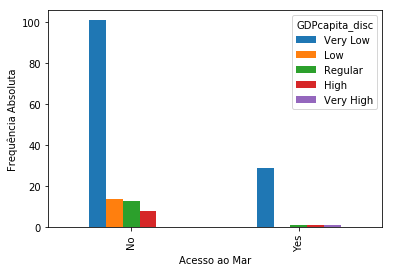

In [14]:
ct1.plot(kind='bar')
plt.ylabel('Frequência Absoluta')
plt.xlabel('Acesso ao Mar')
plt.show()

<a id="normalizar_crosstab"></a>
**Normalizando a crosstab:**

In [15]:
ct2 = pd.crosstab(df['landlocked'], df['GDPcapita_disc'], normalize = 'columns')
# normalize pode receber 'index' para normalizar linhas e True para normalizar tudo
ct2 = ct2 * 100
ct2.round(2)

GDPcapita_disc,Very Low,Low,Regular,High,Very High
landlocked,,,,,
No,77.69,100.0,92.86,88.89,0.0
Yes,22.31,0.0,7.14,11.11,100.0


<a id="describe"></a>
**Descrevendo uma variável quantitativa:**

In [17]:
df['GDPcapita'].describe().round(2)

count      168.00
mean      7354.00
std      10615.78
min        105.53
25%        701.35
50%       2385.57
75%       8546.12
max      52222.58
Name: GDPcapita, dtype: float64

<a id="correlacao"></a>
**Correlação entre duas colunas:**

In [18]:
df['surface'].corr(df['Population'])

0.4509581175132893

<a id="join"></a>
**Juntando 2 DataFrames diferentes:**

In [19]:
co2 = pd.read_excel('indicator CDIAC carbon_dioxide_emissions_per_capita.xlsx')
income = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx')
# Lendo os dois arquivos.
co2 = co2.set_index('CO2 per capita')
income = income.set_index('GDP per capita')
# Para fazer o join é ideal que os índices sejam os mesmos em ambos os DataFrames.
co2 = co2.loc[:, co2.columns[-5:]]
income = income.loc[:, income.columns[-8:-3]]
# Deixando apenas os anos de 2008 até 2012 de cada DataFrame para facilitar visualização.

df2 = co2.join(income, how = 'inner', lsuffix = '_co2', rsuffix = '_income')
# how = 'inner' significa que o novo índice será a intersecção dos índices dos DataFrames usados para formar o df2.
df2.head(5)

,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2008_income,2009_income,2010_income,2011_income,2012_income
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,0.131602,0.213325,0.262174,NaN,NaN,1311.0,1548.0,1637.0,1695.0,1893.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,1.297753,1.215055,1.336544,NaN,NaN,8644.0,8994.0,9374.0,9640.0,9811.0
Algeria,3.328945,3.564361,3.480977,3.562504,3.785654,12314.0,12285.0,12494.0,12606.0,12779.0


<a id="quantil"></a>
**Filtrando por quantil:**

In [20]:
df[df['Population'] >= df['Population'].quantile(0.95)].sort_values(by = 'Population', ascending = False)

,Population,GDPcapita,surface,region,landlocked,GDPcapita_disc
Country,,,,,,
China,1340968737,2426.332466,9600000,east_asia_pacific,No,Very Low
India,1230984504,794.801256,3287260,asia_west,No,Very Low
United States,309876170,37329.615914,9831510,america_north,No,High
Indonesia,241613126,1145.385435,1904570,east_asia_pacific,No,Very Low
Brazil,198614208,4716.614125,8514880,america_south,No,Very Low
Pakistan,170043918,664.711270,796100,asia_west,No,Very Low
Nigeria,159424742,540.685211,923770,africa_sub_saharan,No,Very Low
Bangladesh,151616777,558.062385,144000,asia_west,No,Very Low
Russia,143158099,2928.005033,17098240,europe_east,No,Very Low


<a id="boxplot"></a>
**Boxplot:**

LS = 20313.27
Q3 = 8546.12
Mediana = 2385.57
Q1 = 701.35
LI = -11065.80
Como não há outliers para baixo LI = 105.53


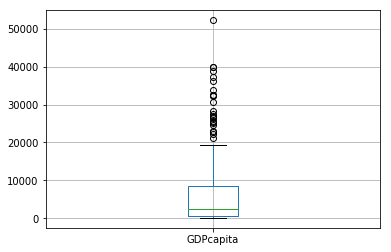

In [21]:
df['GDPcapita'].plot.box()
plt.grid(True);
# Limite Inferior = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)
# Limite Superior = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro Quartil)
Q1 = df.GDPcapita.describe()[4]
Q3 = df.GDPcapita.describe()[6]
print('LS = {0:.2f}'.format(Q3 + 1.5 * (Q3 - Q1)))
print('Q3 = {:.2f}'.format(Q3))
print('Mediana = {:.2f}'.format(df.GDPcapita.describe()[5]))
print('Q1 = {:.2f}'.format(Q1))
print('LI = {0:.2f}'.format(Q1 - 1.5 * (Q3 - Q1)))
# Como não há nenhum valor inferior ao Limite Inferior a cauda vai até o menor valor.
print('Como não há outliers para baixo LI = {:.2f}'.format(df.GDPcapita.min()))

<a id="boxplot_agrupamento"></a>
**Boxplot com agrupamento:**

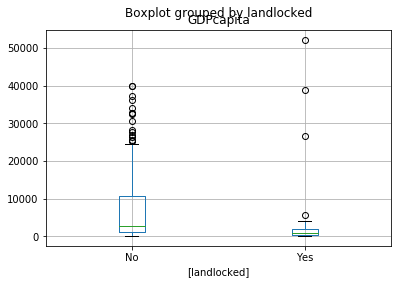

In [22]:
df.loc[:, ['GDPcapita', 'landlocked']].boxplot(by = 'landlocked');

<a id="histograma_densidade"></a>
**Histograma de densidade:**

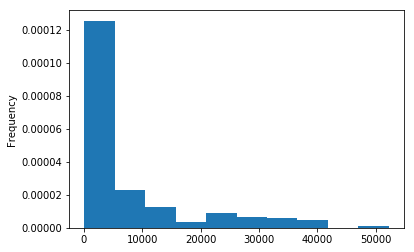

In [23]:
df.GDPcapita.plot.hist(density = True, bins = 10);

<a id="duas_variaveis"></a>
**Analisando duas variáveis:**

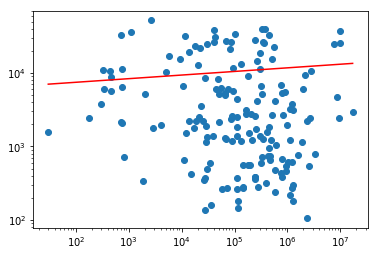

Correlação entre surface e GDPcapita = 0.07


In [24]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a * dados_x.mean()
    
    plt.plot((dados_x.min(), dados_x.max()), (a * dados_x.min() + b, a * dados_x.max() + b), color = 'red')
    
area = df.surface
renda = df.GDPcapita

plt.scatter(area, renda)
plt.yscale('log')
plt.xscale('log')
reta(area, renda)
plt.show()

print('Correlação entre surface e GDPcapita = {}'.format(df.surface.corr(df.GDPcapita).round(2)))

## Modelos Probabilísticos

<a id="exercicios"></a>
**Exercícios Normal:**

Colesterol é um ácido graxo que é componente importante da membrana das células dos animais. A faixa normal para um adulto é entre $120-240 mg/dl$. O Instituto de Nutrição e Saúde das Filipinas descobriu que os adultos daquele país têm média de 159.2 mg/dl e 84.1% dos adultos têm um nível de menos que 200 mg/dl. Suponha que o colesterol é distribuído normalmente

1. Encontre o desvio padrão desta distribuição
2. Quais são os quartis da distribuição?
3. Qual o valor de colesterol excedido por 90% da população?
1. Um adulto tem risco moderado se está mais que 2 desvios padrão acima da média. Qual a porcentagem da população que está em risco?


In [25]:
# Exercício 1
# P(X<200) = 0.841
mi = 159.2

z = stats.norm.ppf(0.841)

# z = (x - mi) / sigma
sigma = (200 - mi) / z
print('1. Desvio Padrão = {:.2f}'.format(sigma))

# Exercício 2
Q1 = stats.norm.ppf(0.25, loc = mi, scale = sigma)
Q3 = stats.norm.ppf(0.75, loc = mi, scale = sigma)
print('2. Q1 = {}'.format(Q1.round(2)))
print('   Q3 = {}'.format(Q3.round(2)))

# Exercício 3
# 1 - 0.9 = 0.1
resp3 = stats.norm.ppf(0.1, loc = mi, scale = sigma)
print('3. 90% da população tem um colesterol maior que {:.2f}'.format(resp3))

# Exercício 4
valor = mi + 2 * sigma
risco = 1 - stats.norm.cdf(valor, loc = mi, scale = sigma)
print('4. O percentual de pessoas que está em risco é de {:.2f}%'.format(risco * 100))

1. Desvio Padrão = 40.86
2. Q1 = 131.64
   Q3 = 186.76
3. 90% da população tem um colesterol maior que 106.84
4. O percentual de pessoas que está em risco é de 2.28%


Você recebeu o arquivo `dados_normal.txt` com dados de concentração (em $\mu g/L$) de um determinado poluente em um tanque de combustível

Pede-se:

1. Visualize o histograma dos dados
1. Usando um plot de probabilidade, ou QQ-Plot, verifique se os dados aparentam seguir uma distribuição normal
1. Realize o `fit`  de uma distribuição normal, e faça o plot da `pdf` sobre o histograma de densidade da distribuição

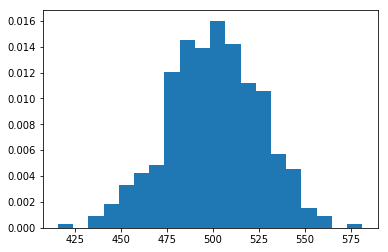

In [26]:
dados = ""
with open("dados_normal_1000.txt") as f:
    dados = " ".join(f.readlines())

# Exercício 1
dados = [float(value) for value in dados.split()]
plt.hist(dados, density = True, bins = 20);

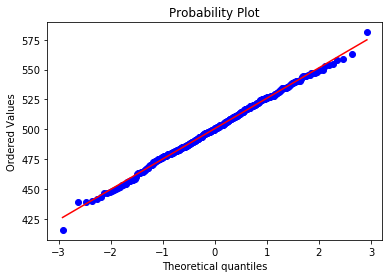

In [27]:
# Exercício 2
stats.probplot(dados, dist = "norm", plot = plt);

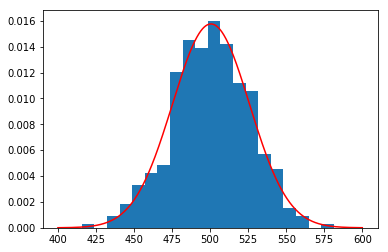

In [28]:
# Exercício 3
loc, scale = stats.norm.fit(dados)
x = np.linspace(400, 600, 1000)
y = stats.norm.pdf(x, loc = loc, scale = scale)

plt.hist(dados, density=True, bins=20);
plt.plot(x, y, 'r-')
plt.show()

<a id="curvas_amostras"></a>
**Construindo as curvas e gerando amostras aleatórias:**

In [29]:
n = 100000
# Vamos criar uma faixa no eixo x, válida para ambas
eixo_x = np.linspace(-1, 20, 600)

pdf_unif = stats.uniform.pdf(eixo_x, loc = 4, scale = 3)
pdf_exp = stats.expon.pdf(eixo_x, scale = 3)

x = stats.uniform.rvs(loc = 4, scale = 3, size = n)
y = stats.expon.rvs(scale = 3, size = n)

<a id="combinacao"></a>
**Fazendo a combinação das amostras aleatórias:**

In [30]:
z = x + y # note que estamos somando elemento a elemento de x e y e obtendo um novo array

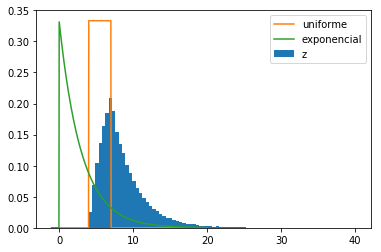

In [31]:
plt.hist(z, label="z", bins=80, density=True)
plt.plot(eixo_x, pdf_unif, label="uniforme")
plt.plot(eixo_x, pdf_exp, label="exponencial")
plt.legend();